In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore") # python doesn't like columns with symbols in the name

### 3. Open cluster metallicities in the Milky Way

*Author: Nick Faucher*

In [2]:
# data from http://cdsarc.u-strasbg.fr/viz-bin/qcat?J/A+A/389/871
# README: http://cdsarc.u-strasbg.fr/ftp/J/A+A/389/871/ReadMe
hdul = fits.open('J_A+A_389_871_clusters.dat.fits')
hdr = hdul[1].data
print('There are', len(hdr['Cluster']), 'clusters')

There are 2167 clusters


In [3]:
ra = hdr['RAh'] * 15. + (hdr['RAm']/60) * 15 + (hdr['RAs']/3600) * 15
dec_sign_str = hdr['DE-']
dec_sign = np.zeros(len(dec_sign_str))
dec = hdr['DEd'] + (hdr['DEm']/60) + (hdr['DEs']/3600) # in degrees
for i in range(len(dec_sign_str)):
    if dec_sign_str[i] == '+':
        dec_sign[i] = 1
    else:
        dec_sign[i] = -1
dec = dec*dec_sign

In [4]:
metallicity = hdr['[Fe/H]']
d = hdr['Dist'] # distance from Earth to cluster in pc
r_s = 8585 # distance from sun to MW center in pc

In [5]:
c_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs', unit='deg')

l = c_icrs.galactic.l.radian
b = c_icrs.galactic.b.radian

In [6]:
# use galactic coordiantes to find distance from MW center
# law of cosines to calculate distance from MW center to cluster projected onto the plane of the disk
r1 = np.sqrt(d**2 + r_s**2 - (2 * d * r_s * np.cos(l))) 
r2 = d * np.sin(b) # distance of cluster from plane of galactic disk
r_MW = np.sqrt(r1**2 + r2**2) # distance of cluster from MW center

In [7]:
count = 0
for i in range(len(metallicity)):
    if metallicity[i] == 0:
        count = count + 1

print('Number of clusters with no metallicity data', count)


Number of clusters with no metallicity data 1869


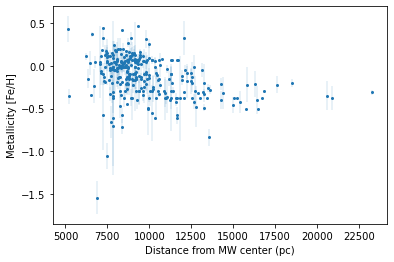

In [8]:
mask = metallicity != 0 # mask to filter out data points with no metallicity data

error_metal = hdr['e_[Fe/H]']

plt.errorbar(r_MW[mask],metallicity[mask], yerr=error_metal[mask],
             marker='o', markersize=2, linewidth=0, elinewidth=0.2)
plt.xlabel('Distance from MW center (pc)')
plt.ylabel('Metallicity [Fe/H]')
plt.show()

This result shows clearly how the metallicity of recently formed stars declines with distance from the center of the Milky Way.